<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula01a_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import numpy as np

def criaDataset(n=20):
  X = np.random.uniform(size=(n,2))
  y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
print(X)
print(y)

[[0.80632972 0.70829399]
 [0.05492307 0.83559513]
 [0.23724358 0.93198081]
 [0.98207952 0.98933082]
 [0.31871837 0.25693367]
 [0.4271015  0.3145418 ]
 [0.23665344 0.79510484]
 [0.67378723 0.46590064]
 [0.7458589  0.62813998]
 [0.29515333 0.348457  ]
 [0.35197569 0.53959393]
 [0.7832384  0.26671662]
 [0.48262944 0.07252774]
 [0.10060336 0.461397  ]
 [0.92517216 0.83977819]
 [0.11276883 0.00814605]
 [0.88356275 0.00256335]
 [0.30996819 0.8074825 ]
 [0.48569051 0.10041584]
 [0.91008189 0.71082736]]
[ 1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1]


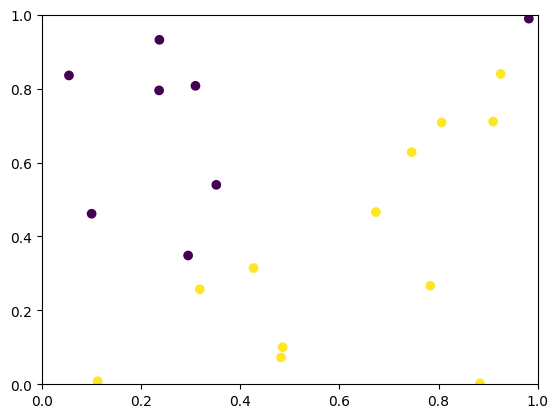

In [301]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)

plotDataset(X, y)
plt.show()

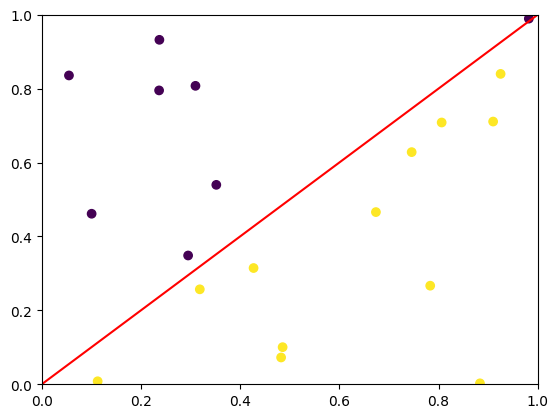

In [302]:
def plotHiperplano(vector):
  xs = np.array([0, 1])
  ys = -(vector[0]*xs)/vector[1]
  plt.plot(xs, ys, 'r-')

plotDataset(X, y)
plotHiperplano(vector=[5,-5])
plt.show()

In [303]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1

class DummyClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self):
    pass

  def fit(self, X, y):
    self.classes_ = np.unique(y)
    return self

  def predict(self, X):
    # return np.array(X[:,0]>X[:,1], dtype=int)*2-1
    # return np.random.choice(self.classes_, size=len(X))
    vetor = np.array([1,-1])
    ypred = X @ vetor
    return sign(ypred)

ypred = DummyClassifier().fit(X, y).predict(X)
print(accuracy_score(y, ypred))

1.0


In [304]:
class PerceptronPLA(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=100):
    self.epochs = range(epochs)

  def fit(self, X, y):
    self.w = np.random.uniform(size=X.shape[1])*2-1
    # PLA = Perceptron Learning Algorithm
    for _ in self.epochs:
      cost = 0
      idx = np.arange(len(y))
      np.random.shuffle(idx)
      for i in idx:
        ypred = sign(X[i] @ self.w)
        error = y[i]-ypred
        if error:
          self.w += error*X[i]
          cost += error**2
      if cost == 0:
        break
    return self

  def predict(self, X):
    return sign(X @ self.w)

model = PerceptronPLA()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(ypred)
print(accuracy_score(y, ypred))

[ 3.39609349 -3.39868044]
[ 1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1]
1.0


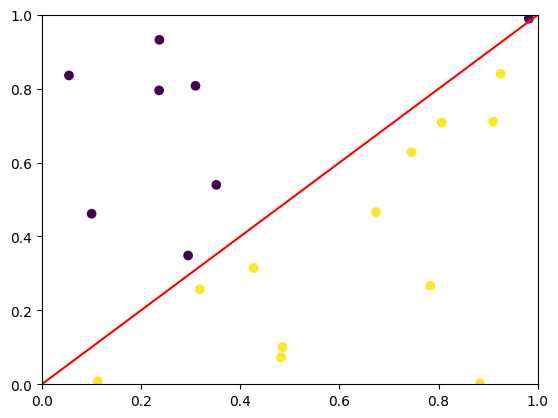

In [305]:
plotDataset(X, y)
plotHiperplano(vector=model.w)
plt.show()

In [306]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))

1.0


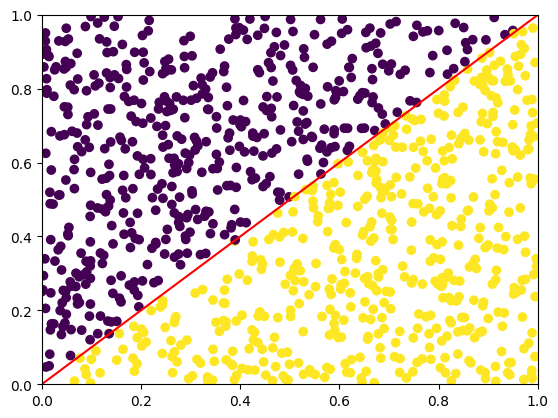

In [307]:
plotDataset(Xtest, ytest)
plotHiperplano(vector=model.w)
plt.show()

In [308]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=100):
    self.epochs = range(epochs)

  def fit(self, X, y):
    self.w = np.random.uniform(size=X.shape[1])*2-1
    # Notação vetorial
    for _ in self.epochs:
        ypred = sign(X @ self.w)
        error = y-ypred
        self.w += X.T @ error
        cost = sum(error**2)
        if cost == 0:
          break
    return self

  def predict(self, X):
    return sign(X @ self.w)

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(ypred)
print(accuracy_score(y, ypred))

[ 13.03293426 -13.49776453]
[ 1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1]
1.0


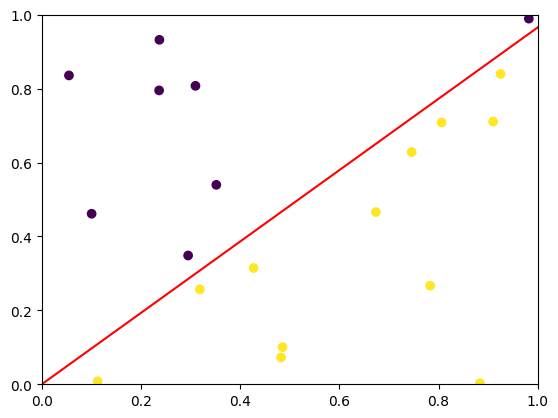

In [309]:
plotDataset(X, y)
plotHiperplano(vector=model.w)
plt.show()

In [310]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.989


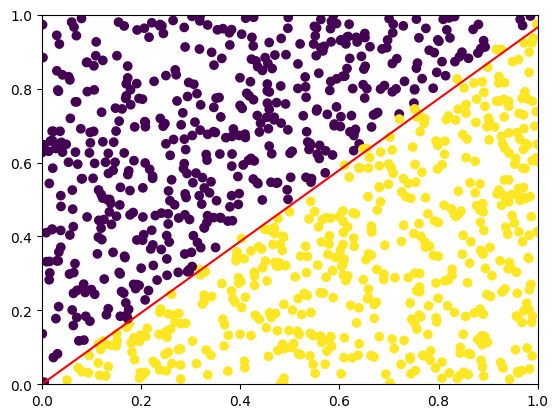

In [311]:
plotDataset(Xtest, ytest)
plotHiperplano(vector=model.w)
plt.show()

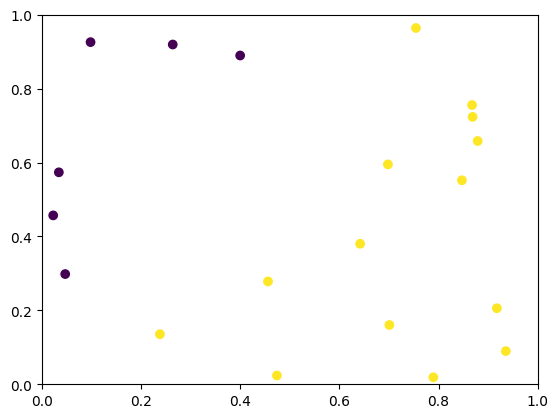

In [312]:
def criaDataset(n=20, slop=[2,1]):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop)
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
plotDataset(X, y)
plt.show()

In [313]:
model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(ypred)
print(accuracy_score(y, ypred))

[15.2804612  -8.80386671]
[ 1  1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1]
1.0


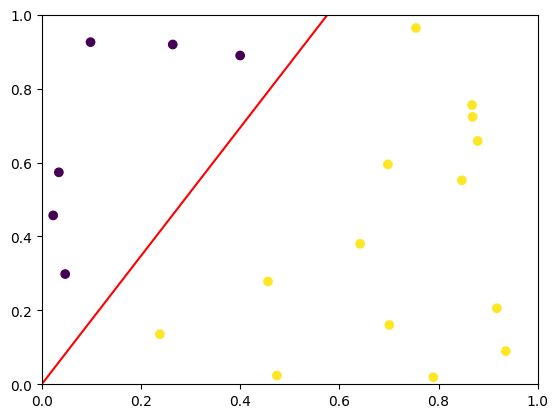

In [314]:
plotDataset(X, y)
plotHiperplano(vector=model.w)
plt.show()

0.957


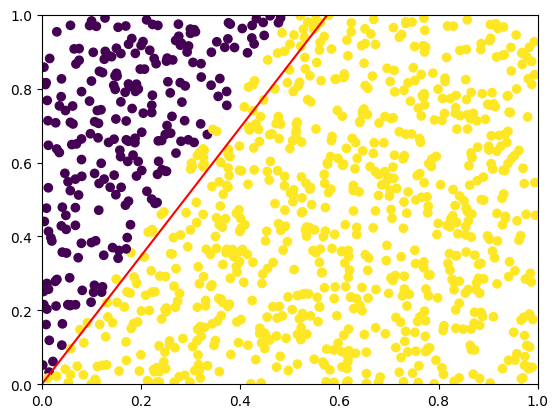

In [315]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(vector=model.w)
plt.show()